# Breast Cancer (Scikit-learn Dataset)

Oleh : Rajendra Artanto Wiryawan Sujana


# 1. IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 2. LOAD DATASET

In [ ]:
# Load Dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

df_X = pd.DataFrame(X, columns=breast_cancer.feature_names)
df_y = pd.Series(y, name='target')

# Gabungkan fitur dan target dalam satu dataframe
df = pd.concat([df_X, df_y], axis=1)

# 3. Exploratory Data Analysis (EDA)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

a. Countplot

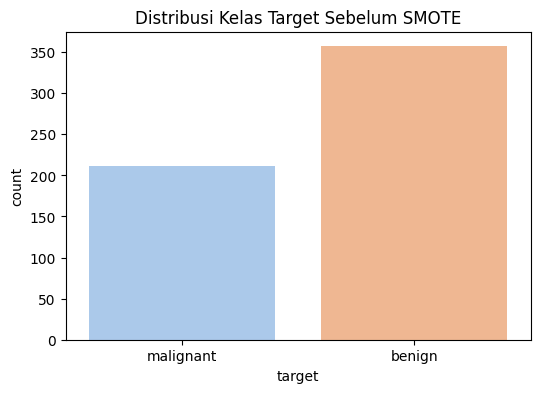

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df, palette="pastel")
plt.title("Distribusi Kelas Target Sebelum SMOTE")
plt.xticks(ticks=[0, 1], labels=breast_cancer.target_names)
plt.show()

In [ ]:
class_distribution = df_y.value_counts(normalize=True) * 100
print(class_distribution)

target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


b. Heatmap

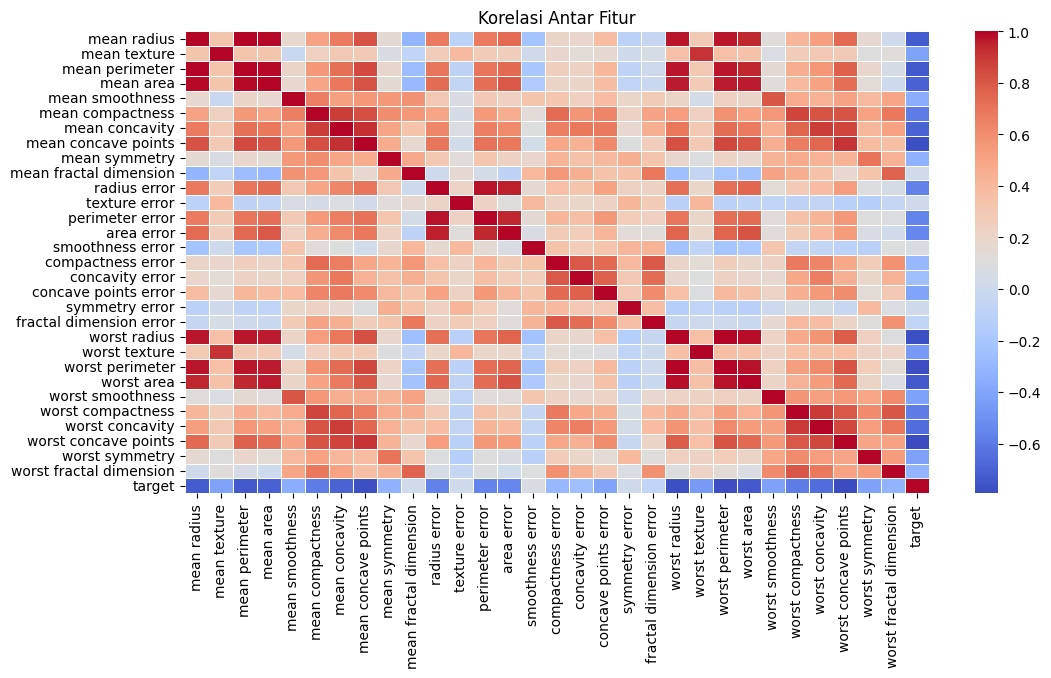

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()

# 4. Preprocessing Data

a. Teknik SMOTE

In [ ]:
# Menyeimbangkan dataset dengan SMOTE sebelum train-test split
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_X, df_y)

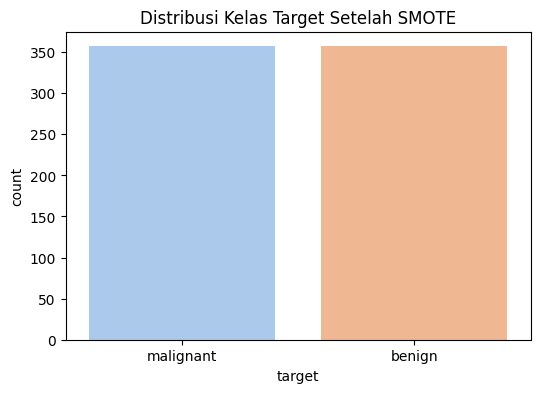

In [ ]:
# Cek distribusi kelas setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette="pastel")
plt.title("Distribusi Kelas Target Setelah SMOTE")
plt.xticks(ticks=[0, 1], labels=breast_cancer.target_names)
plt.show()

In [ ]:
class_distribution = y_resampled.value_counts(normalize=True) * 100
print(class_distribution)

target
0    50.0
1    50.0
Name: proportion, dtype: float64


b. Split Data

In [ ]:
# Split Data setelah balancing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Generate ML Model

In [ ]:
# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model dengan Parameter Terbaik
best_gbc = grid_search.best_estimator_
y_pred = best_gbc.predict(X_test)

# 6. Evaluasi Model

a. Classification Report

In [ ]:
# Evaluasi Model
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))


=== Classification Report ===
              precision    recall  f1-score   support

   malignant       0.96      0.97      0.97        74
      benign       0.97      0.96      0.96        69

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
from sklearn.metrics import classification_report

# Mendapatkan classification report dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Format hasil menjadi persen dengan 2 angka di belakang koma
formatted_report = {}

for key, value in report.items():
    if isinstance(value, dict):  # Jika nilai adalah dictionary (kelas, macro avg, weighted avg)
        formatted_report[key] = {
            metric: f"{value[metric] * 100:.2f}%" if metric != "support" else f"{value[metric]:.0f}"
            for metric in value
        }
    else:  # Untuk accuracy yang langsung berupa angka
        formatted_report[key] = f"{value * 100:.2f}%"

# Cetak hasil dengan format yang lebih rapi
for key, value in formatted_report.items():
    if isinstance(value, dict):
        print(f"\nClass {key}:")
        for metric, score in value.items():
            print(f"  {metric.capitalize()}: {score}")
    else:
        print(f"\nClass accuracy:\n  Accuracy: {value}")


Class 0:
  Precision: 96.00%
  Recall: 97.30%
  F1-score: 96.64%
  Support: 74

Class 1:
  Precision: 97.06%
  Recall: 95.65%
  F1-score: 96.35%
  Support: 69

Class accuracy:
  Accuracy: 96.50%

Class macro avg:
  Precision: 96.53%
  Recall: 96.47%
  F1-score: 96.50%
  Support: 143

Class weighted avg:
  Precision: 96.51%
  Recall: 96.50%
  F1-score: 96.50%
  Support: 143


b. Confusion Matrix

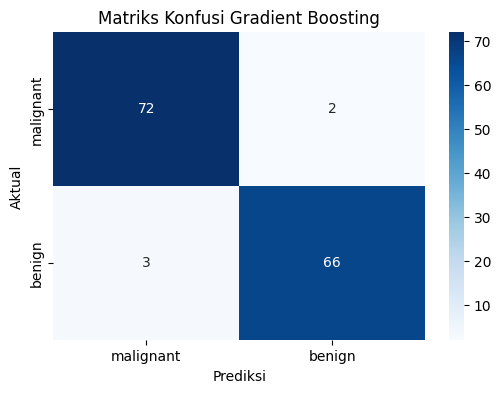

In [ ]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi Gradient Boosting")
plt.show()

c. Feature Importance

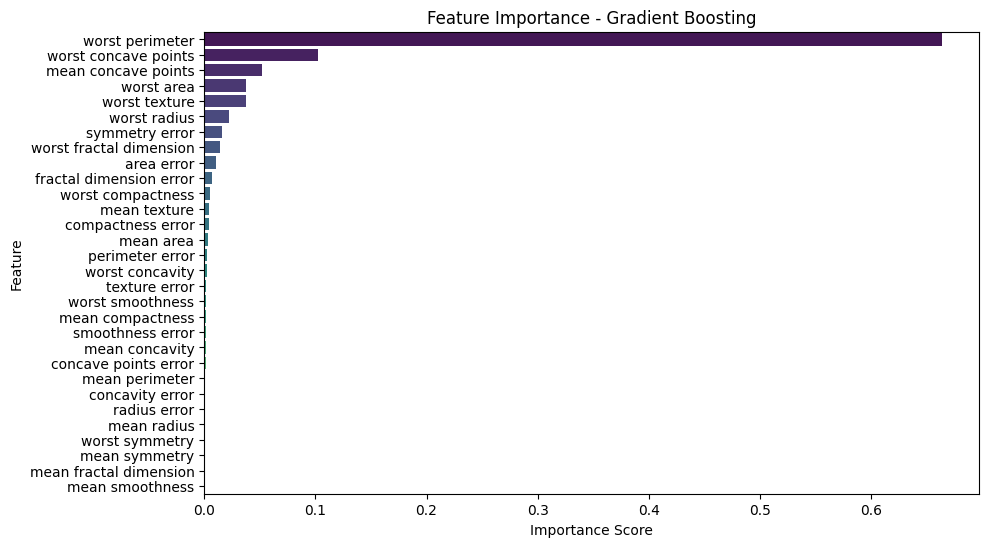

In [ ]:
# Feature Importance
feature_importance = pd.Series(best_gbc.feature_importances_, index=df_X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Gradient Boosting")
plt.show()